In [1]:
# Importing necessary libraries for the project

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
# Loading the dataset
Data = "D:\\Wscude projects\\week 14\\imdb_movies.csv"
df = pd.read_csv(Data)

In [7]:
#display the top 5 rows of datasets
df.head()

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US


## Data overview and Basic Exploration 

### Task : explore the structure and composition of the dataset

In [10]:
#Display the shape and first few rows of the dataset
print("shape of the dataset:", df.shape)

df.info()

shape of the dataset: (10178, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   names       10178 non-null  object 
 1   date_x      10178 non-null  object 
 2   score       10178 non-null  float64
 3   genre       10093 non-null  object 
 4   overview    10178 non-null  object 
 5   crew        10122 non-null  object 
 6   orig_title  10178 non-null  object 
 7   status      10178 non-null  object 
 8   orig_lang   10178 non-null  object 
 9   budget_x    10178 non-null  float64
 10  revenue     10178 non-null  float64
 11  country     10178 non-null  object 
dtypes: float64(3), object(9)
memory usage: 954.3+ KB


### Rows : Each row represents a unique movie and contains details like its title , genre, release data , rating , and other attributes.

### Columns : Each column represents a feature or attribute of the movies, such as genre, budget_x , revenue , etc.

In [12]:
#The issue is with the date_x column as its dtype is given as object
#convert data type of data_x into datetime

df["date_x"] = pd.to_datetime(df["date_x"])

In [13]:
# checking the datatype again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   names       10178 non-null  object        
 1   date_x      10178 non-null  datetime64[ns]
 2   score       10178 non-null  float64       
 3   genre       10093 non-null  object        
 4   overview    10178 non-null  object        
 5   crew        10122 non-null  object        
 6   orig_title  10178 non-null  object        
 7   status      10178 non-null  object        
 8   orig_lang   10178 non-null  object        
 9   budget_x    10178 non-null  float64       
 10  revenue     10178 non-null  float64       
 11  country     10178 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(8)
memory usage: 954.3+ KB


In [14]:
# Summary statistics for numerical columns
df.describe()

,date_x,score,budget_x,revenue
count,10178,10178.000000,1.017800e+04,1.017800e+04
mean,2008-06-15 06:16:37.445470720,63.497052,6.488238e+07,2.531401e+08
min,1903-05-15 00:00:00,0.000000,1.000000e+00,0.000000e+00
25%,2001-12-25 06:00:00,59.000000,1.500000e+07,2.858898e+07
50%,2013-05-09 00:00:00,65.000000,5.000000e+07,1.529349e+08
75%,2019-10-17 00:00:00,71.000000,1.050000e+08,4.178021e+08
max,2023-12-31 00:00:00,100.000000,4.600000e+08,2.923706e+09
std,NaN,13.537012,5.707565e+07,2.777880e+08


In [15]:
# checking for missing values and their counts
df.isnull().sum()

names          0
date_x         0
score          0
genre         85
overview       0
crew          56
orig_title     0
status         0
orig_lang      0
budget_x       0
revenue        0
country        0
dtype: int64

Data Cleaning 

Task: Address missing values, data types, and outliers.

In [18]:
#Missing Values 
#Genre column have 85 missing values which contains Genres of movies 
#FiLLing Genre with "Unavaiable" as its an object type 
df ["genre"] = df ["genre"].fillna("unavalable")

In [19]:
#Crew column have 56 missing values whien contains Cast and crew information 
#Filling it some with "Unavalable as its also an object type 
df["crew"] = df["crew"].fillna("unavaiable") 

## Univariate Analysis: Explore each column individually

### Task: Perform univariate analysis on numerical and categorical variables

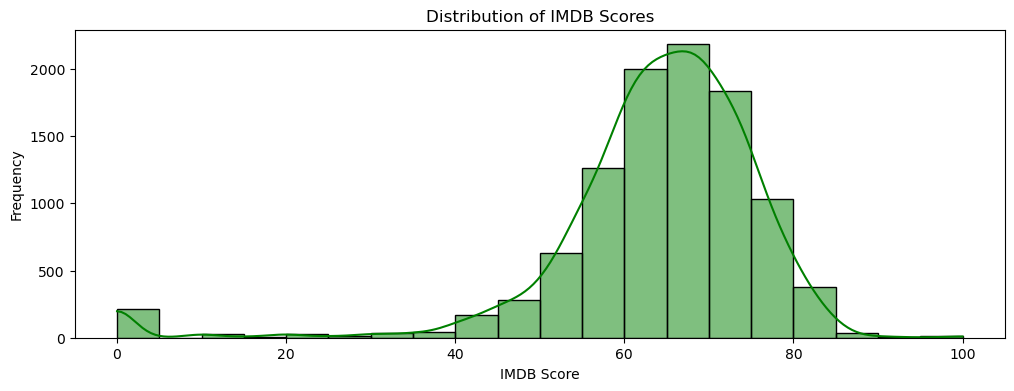

The distribution of IMDB scores shows that:
- It appears to be approximately normal but slightly left-skewed (tail on the lower end).
- Most scores are concentrated between 58 and 80, with a gradual decline outside this range.
- There are very few movies with extremely low or perfect scores (8 or 180).


In [22]:
#Analyze the distribution of InDe ratings (score) using a histogram and describe its shape 

#Plotting the distribution of INDE scores 

plt.figure(figsize=(12, 4)) 
sns.histplot(df ["score"], kde = True, bins =  20, color="green") 
plt.title("Distribution of IMDB Scores") 
plt.xlabel("IMDB Score") 
plt.ylabel("Frequency") 
plt.show()

#Description of the shope 
print("The distribution of IMDB scores shows that:") 
print("- It appears to be approximately normal but slightly left-skewed (tail on the lower end).") 
print("- Most scores are concentrated between 58 and 80, with a gradual decline outside this range.") 
print("- There are very few movies with extremely low or perfect scores (8 or 180).")

In [23]:
# What are the most common gennes in the dataset? Use a bor chart to show their distribution


In [24]:
# Group by genre and count the number of movies 
gb = df.groupby("genre").agg({"names": "count"}) 
gb = gb.sort_values (by="names", ascending = False) 
gb = gb.head(20)

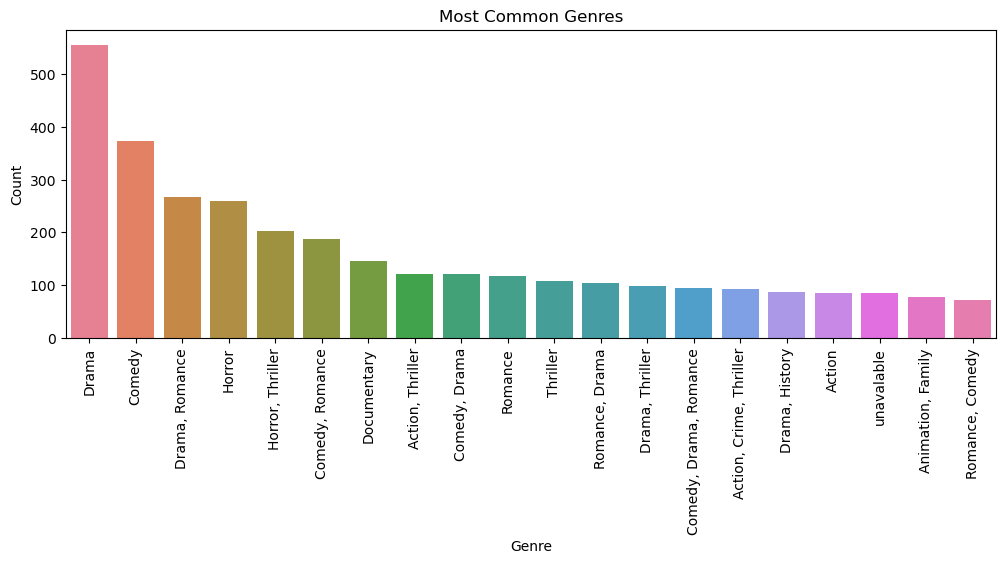

The most common gener in the dataset is : Drama


In [25]:
# Plotting the bar chart 
plt.figure(figsize = (12, 4)) 
sns.barplot(x=gb.index,y=gb ["names"], data = gb, hue = gb.index) 
plt.title("Most Common Genres") 
plt.xlabel("Genre") 
plt.ylabel("Count") 
plt.xticks(rotation=90) 
plt.show()

# print the most common genre
most_common_genre = gb.index[0]
print(f"The most common gener in the dataset is : {most_common_genre}")

## Bivariate Analysis: Explore relationships between two variables

### Task: Use scatter plots, box plots, and correlation analysis 

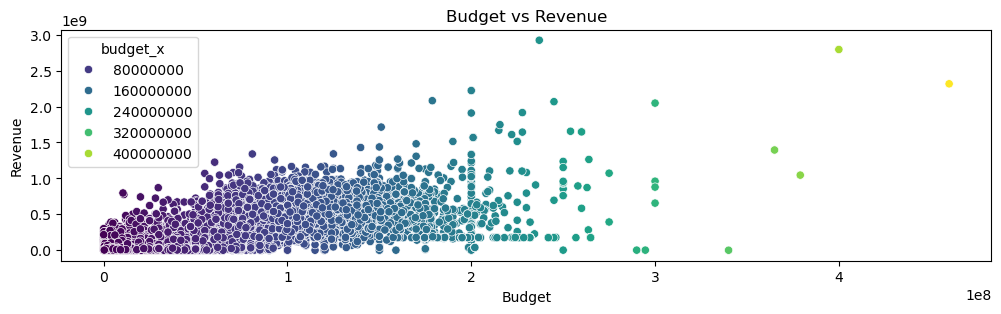

The relationship of budget and revenue shows that:
- There is a positive correlation between budget and revenue. Movies with higher budgets tend to generate higher revenues.
- Most movies are clustered around mid-range budgets (e.g., 80 million).
- Outliers show both successes (high revenue, high budget) and failures (high budget, low revenue).


In [28]:
#Explore the relationship between budget and revenue using a scotter plot. 
#Plotting the Scatter plot 

plt.figure(figsize=(12,3)) 
sns.scatterplot(x = "budget_x", y = "revenue", data = df, hue = "budget_x", palette = "viridis") 
plt.title("Budget vs Revenue") 
plt.xlabel("Budget") 
plt.ylabel("Revenue") 
plt.show()

# Description observed trend 
print("The relationship of budget and revenue shows that:")
print("- There is a positive correlation between budget and revenue. Movies with higher budgets tend to generate higher revenues.") 
print("- Most movies are clustered around mid-range budgets (e.g., 80 million).")
print("- Outliers show both successes (high revenue, high budget) and failures (high budget, low revenue).")

In [29]:
# Compare IHOR ratings (score) across Country using a boxplot. 

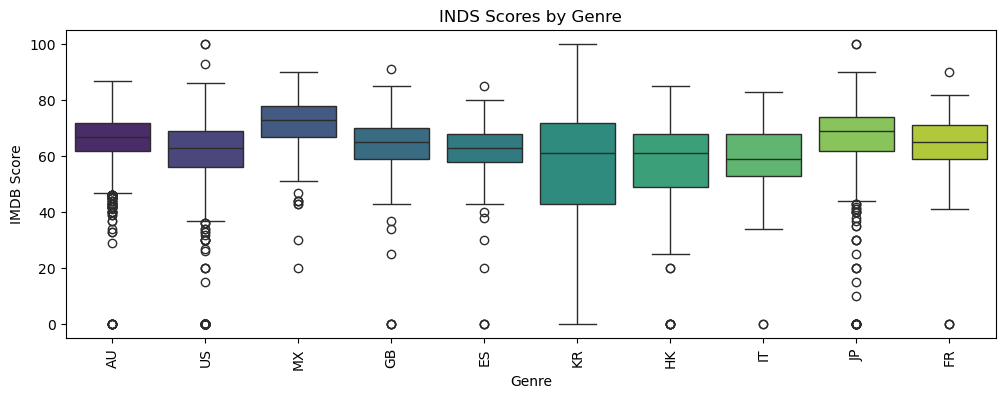

The IMDB score across contries:
- The distribution of ratings varies significantly across countries.
- Some countries exhibit tighter distributions, while others have a wider range of scores.
-The median rating differs by country, providing insight into regional preferences and quality of movies.


In [30]:
# Boxplot for IMDB score across countries 

top_countries = df ["country"].value_counts().head(10).index # Top 10 countries by monte count 
plt.figure(figsize=(12, 4)) 
sns.boxplot(data=df [df ["country"].isin(top_countries)], x="country", y="score", hue="country", palette="viridis", legend=False) 
plt.title("INDS Scores by Genre") 
plt.xlabel("Genre") 
plt.ylabel("IMDB Score") 
plt.xticks(rotation=90) 
plt.show() 

# Description 

print("The IMDB score across contries:") 
print("- The distribution of ratings varies significantly across countries.") 
print("- Some countries exhibit tighter distributions, while others have a wider range of scores.") 
print("-The median rating differs by country, providing insight into regional preferences and quality of movies.")

In [31]:
# Is there a correlation between the number of votes a movie recived and its rating?
# create a scatter plot and colculate the correlation caefficent
# crreate a dataframe to store score, budget and revenue and find its correlation

df1 = df[["score", "budget_x", "revenue"]]
df1.columns = ["score", "budget", "Revenue"]
corr = df1.corr()
corr

,score,budget,Revenue
score,1.000000,-0.23547,0.096533
budget,-0.235470,1.00000,0.673830
Revenue,0.096533,0.67383,1.000000


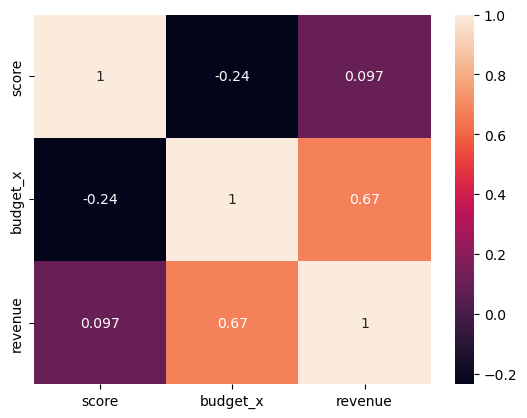

The correlation between budget, score and revenue:
- score and budget: A weak negative correlation of -0.235, meaning as the bedget increases, the score slightly decreases..
- Score and Revenue: A very weak positive correlation of 0.097, suggesting little to no relationship between score and revenue.
- Budget and Revenue: A moderate positive correlation of 0.674, indicating that as the budget increases, revenue tends to increase as well.


In [32]:
# correlation between 'budget_x', 'revenue' and 'score'.

correlation = df[["score", "budget_x", "revenue"]]
data = correlation.corr()
sns.heatmap(data, annot = True)
plt.show()

#Description

print("The correlation between budget, score and revenue:")
print("- score and budget: A weak negative correlation of -0.235, meaning as the bedget increases, the score slightly decreases..")
print("- Score and Revenue: A very weak positive correlation of 0.097, suggesting little to no relationship between score and revenue.") 
print("- Budget and Revenue: A moderate positive correlation of 0.674, indicating that as the budget increases, revenue tends to increase as well.") 

## Genre-Specific Analysiss

### Task : Delve deeper into the hanre of movies

In [35]:
# which genre has the highest avarage rating? calaculate the average rating for each genre and plot the results.

# calculate the average rating for rach genre

In [36]:
avg_rating_by_genre = df.groupby("genre")["score"].mean().sort_values(ascending=False)
avg_rating_by_genre = avg_rating_by_genre.head(10)
print("\nAverage Ratings by Genre:")
print(avg_rating_by_genre)


Average Ratings by Genre:
genre
Fantasy, Drama, Crime                                 85.000000
Adventure, Animation, Comedy, Fantasy, Mystery        85.000000
Romance, Animation, Drama                             85.000000
Animation, Comedy, Romance                            84.666667
Animation, Family, Fantasy, Adventure, Comedy         83.000000
Animation, Action, Comedy, Mystery, Crime, Fantasy    83.000000
Animation, Action, Science Fiction, Drama             83.000000
Animation, Thriller                                   83.000000
Family, Animation, Drama                              83.000000
Adventure, Fantasy, Animation                         83.000000
Name: score, dtype: float64


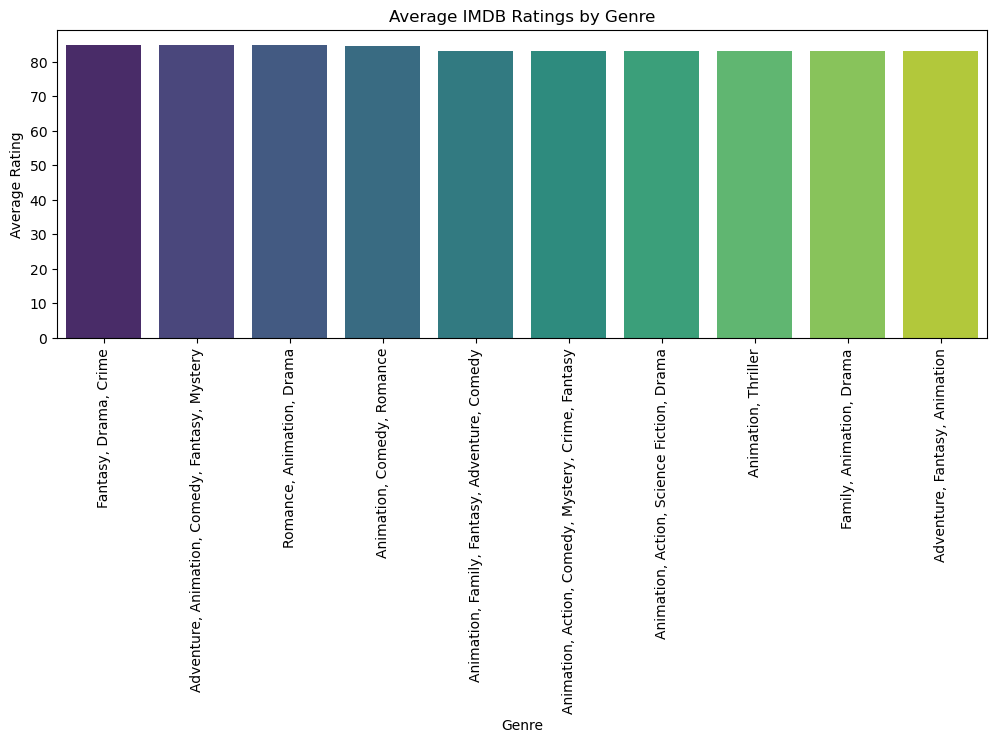

The Average rating for each genre shows that:
- It appears that (Fantasy, Drama, Crime)(Adventure, Animation, Comedy, Fantasy, Mystery)(Romance, Animation, Drama) have highest score


In [37]:
# Plot the graph of average score across genres
plt.figure(figsize=(12, 4))
sns.barplot(x=avg_rating_by_genre.index, y=avg_rating_by_genre.values, hue=avg_rating_by_genre.index, palette='viridis', legend=False)
plt.title("Average IMDB Ratings by Genre")
plt.xlabel("Genre")
plt.ylabel("Average Rating")
plt.xticks(rotation=90)
plt.show()

# Description
print("The Average rating for each genre shows that:")
print("- It appears that (Fantasy, Drama, Crime)(Adventure, Animation, Comedy, Fantasy, Mystery)(Romance, Animation, Drama) have highest score")


      date_x  year
0 2023-03-02  2023
1 2022-12-15  2022
2 2023-04-05  2023
3 2023-01-05  2023
4 2023-03-17  2023


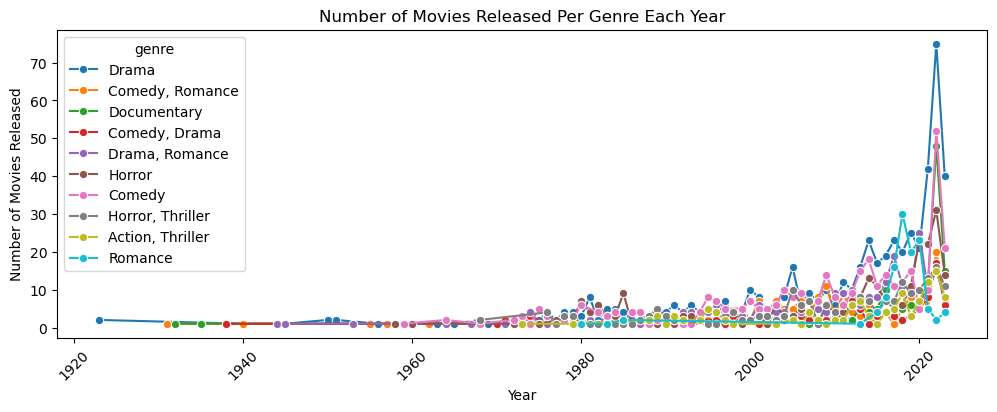

In [38]:
# How does the popularity of genres vary over time? Plot the number of movies released per genre each year.

# Convert 'date_x' to datetime format if it's not already
df['date_x'] = pd.to_datetime(df['date_x'], errors='coerce')

# Extract the year from the 'date_x' column
df['year'] = df['date_x'].dt.year

# Check if the 'year' column is created correctly
print(df[['date_x', 'year']].head())

# Group by 'genre' and 'year', then count movies
movies_per_genre = df.groupby(['year', 'genre']).size().reset_index(name='movie_count')
top_genres = movies_per_genre.groupby('genre')['movie_count'].sum().nlargest(10).index

# Filter the movies data to include only these top genres
filtered_movies = movies_per_genre[movies_per_genre['genre'].isin(top_genres)]

# Plotting Line
plt.figure(figsize=(12, 4))
sns.lineplot(data=filtered_movies, x='year', y='movie_count', hue='genre', marker='o')
plt.title("Number of Movies Released Per Genre Each Year")
plt.xlabel("Year")
plt.ylabel("Number of Movies Released")
plt.xticks(rotation=45)
plt.show()


In [39]:
# Compare budgets and revenues for specific genres.

# Filter data for specific genres
selected_genres = ['Action', 'Comedy', 'Drama']
df_selected_genres = df[df['genre'].isin(selected_genres)]

# Check the first few rows of the filtered data
print(df_selected_genres[['genre', 'budget_x', 'revenue']].head())

     genre    budget_x      revenue
4   Action  77000000.0  340941958.6
22   Drama  25000000.0  622313635.0
42  Action   1000000.0   22790427.2
44   Drama   3000000.0   36752010.0
54  Comedy  51880004.0    9263009.0


In [40]:
# Group by 'genre' and calculate the average budget and revenue
genre_comparison = df_selected_genres.groupby('genre')[['budget_x', 'revenue']].mean()

# Check the result
print(genre_comparison)

            budget_x       revenue
genre                             
Action  4.698863e+07  1.962566e+08
Comedy  5.767277e+07  2.052982e+08
Drama   6.068989e+07  2.495831e+08


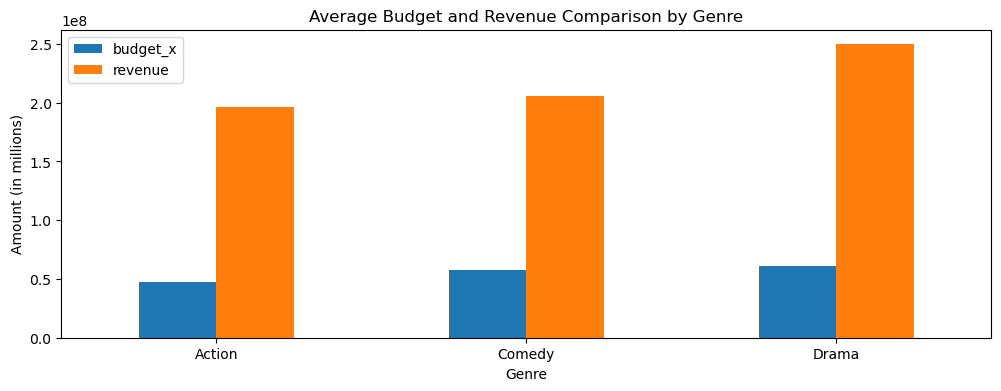

The Average Budget and revenue comparison by genre shows that:
- It shows that Drama Genre needs high budget.
- It also shows Action takes less budget than comedy and drama genre


In [41]:
# Plot the comparison of average budget and revenue per genre

genre_comparison.plot(kind='bar', figsize=(12,4))
plt.title("Average Budget and Revenue Comparison by Genre")
plt.xlabel("Genre")
plt.ylabel("Amount (in millions)")
plt.xticks(rotation=0)
plt.show()

# Description
print("The Average Budget and revenue comparison by genre shows that:")
print("- It shows that Drama Genre needs high budget.")
print("- It also shows Action takes less budget than comedy and drama genre")

## Task: Analyze trends over time

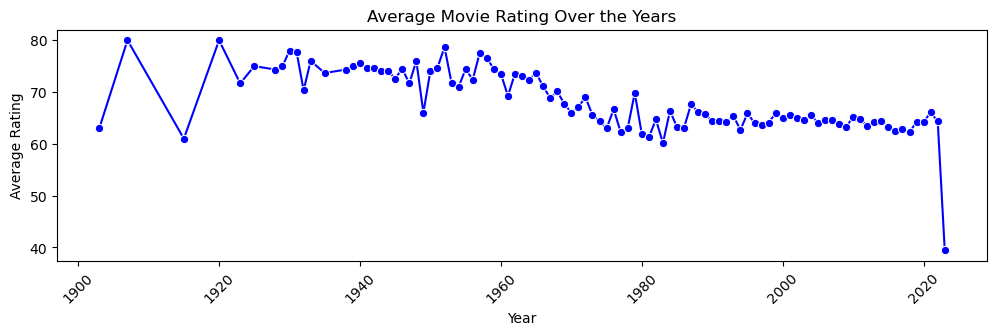

The Average Movie Rating over the years shows that:
- It shows from 1980 to 2020 the average rating Consistent Movie Quality
- There down fall after 2020 in movies may be because expectation of audience


In [43]:
# How has the average movie rating changed over the years? Plot the average rating for each year.

# Group by 'year' and calculate the average rating ('score') for each year
average_rating_per_year = df.groupby('year')['score'].mean().reset_index()

# Showing Line plot for average movie changed over years
plt.figure(figsize=(12,3))
sns.lineplot(data=average_rating_per_year, x='year', y='score', marker='o', color='b')
plt.title("Average Movie Rating Over the Years")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()

# Description
print("The Average Movie Rating over the years shows that:")
print("- It shows from 1980 to 2020 the average rating Consistent Movie Quality")
print("- There down fall after 2020 in movies may be because expectation of audience")

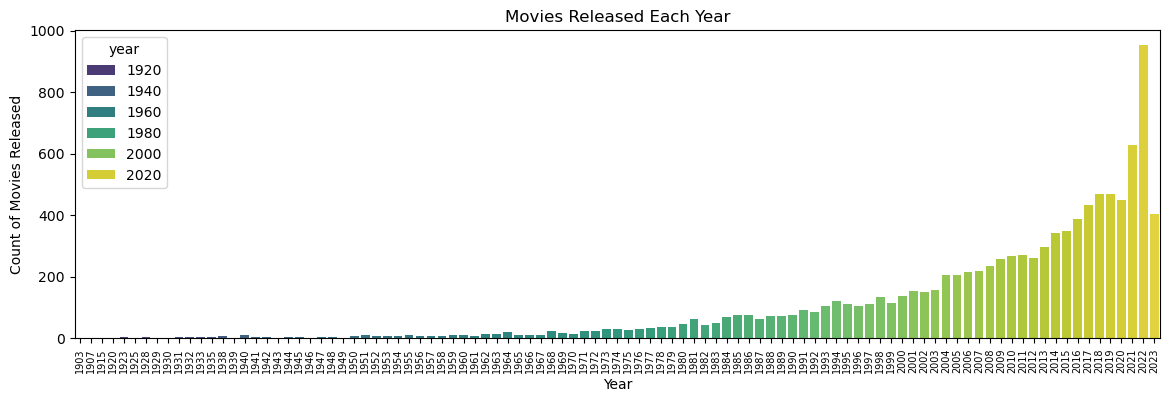

Year with the highest movie releases: 2022
Year with the lowest movie releases: 1903


In [44]:
# Which years had the highest and lowest number of movie releases? 
# Plot the number of movies released each year

# Group by 'year' and count the number of movies released each year
gb = df.groupby('year').agg({'names': 'count'})

# Plot the number of movies released each year using a bar plot
plt.figure(figsize=(14,4))
sns.barplot(x=gb.index, y=gb['names'], hue=gb.index, palette='viridis')
plt.ylabel('Count of Movies Released')
plt.xlabel('Year')
plt.title('Movies Released Each Year')
plt.xticks(rotation=90, fontsize=7)
plt.show()

# Find the year with the highest number of movie releases
highest_releases_year = gb['names'].idxmax()  # This gives the year with the highest releases
print(f"Year with the highest movie releases: {highest_releases_year}")

# Find the year with the lowest number of movie releases
lowest_releases_year = gb['names'].idxmin()  # This gives the year with the lowest releases
print(f"Year with the lowest movie releases: {lowest_releases_year}")


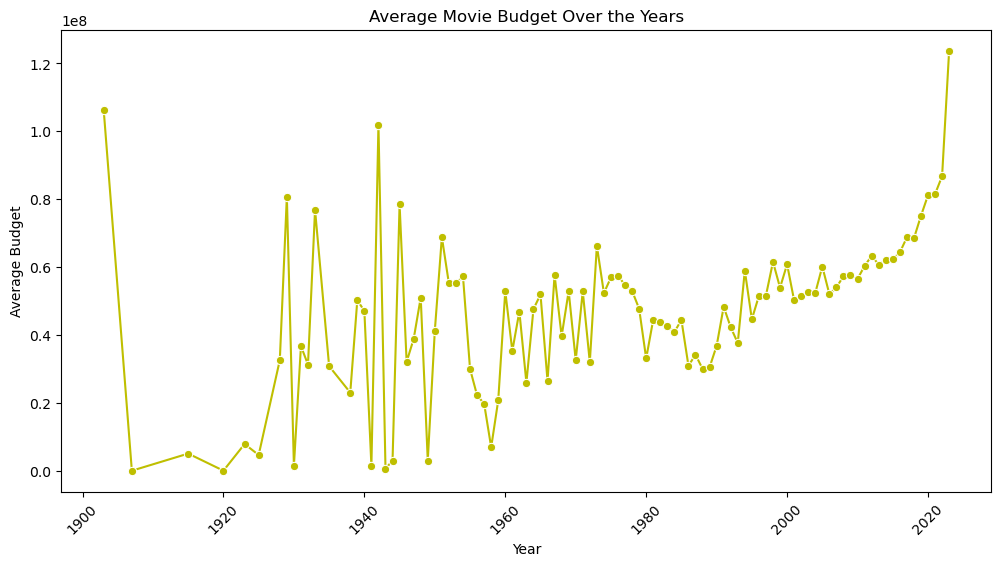

In [45]:
# Do certain years show a higher average budget? Analyze the average budget by year and observe any trends.

# Group by 'year' and calculate the average budget for each year
average_budget_per_year = df.groupby('year')['budget_x'].mean()

# Plot the average budget per year using a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=average_budget_per_year.index, y=average_budget_per_year.values, marker='o', color='y')
plt.title("Average Movie Budget Over the Years")
plt.xlabel("Year")
plt.ylabel("Average Budget")
plt.xticks(rotation=45)
plt.show()

## Multivariate Analysis: Analyze multiple variables together
     

### Combine insights from multiple columns to explore complex relationships


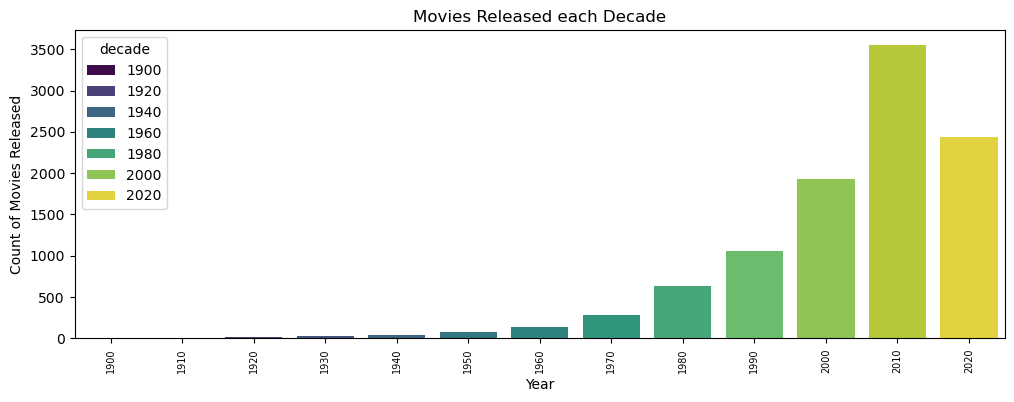

The Movies released each decade plot shows that:
- It Shows in 2010 most movies was popular


In [82]:
# Which genres are most popular in each decade? Create a bar plot showing the most frequent genres by decade.

# Extract the decade from the 'year' column
df['decade'] = (df['year'] // 10) * 10  # Dividing year by 10 and multiplying by 10 to get the start of the decade

# Plot the number of movies released each decade
gb = df.groupby('decade').agg({'genre': 'count'})

plt.figure(figsize=(12, 4))
sns.barplot(x=gb.index, y=gb['genre'], data=gb, hue=gb.index, palette='viridis')
plt.ylabel('Count of Movies Released')
plt.xlabel('Year')
plt.title('Movies Released each Decade')
plt.xticks(rotation=90, fontsize=7)
plt.show()

# Description
print("The Movies released each decade plot shows that:")
print("- It Shows in 2010 most movies was popular")

In [84]:
# Analyze the influence of `budget_x`, `genre`, and `country` on revenues using a heatmap.

# Select the relevant columns and drop any missing values
df_corr = df[['budget_x', 'genre', 'country', 'revenue']].dropna()

# Convert categorical columns into numeric values
df_corr['genre'] = pd.factorize(df_corr['genre'])[0]
df_corr['country'] = pd.factorize(df_corr['country'])[0]

# Calculate the correlation between the variables
corr_matrix = df_corr.corr()

print(corr_matrix)


          budget_x     genre   country   revenue
budget_x  1.000000 -0.013033  0.170086  0.673830
genre    -0.013033  1.000000 -0.024469 -0.012112
country   0.170086 -0.024469  1.000000  0.145555
revenue   0.673830 -0.012112  0.145555  1.000000


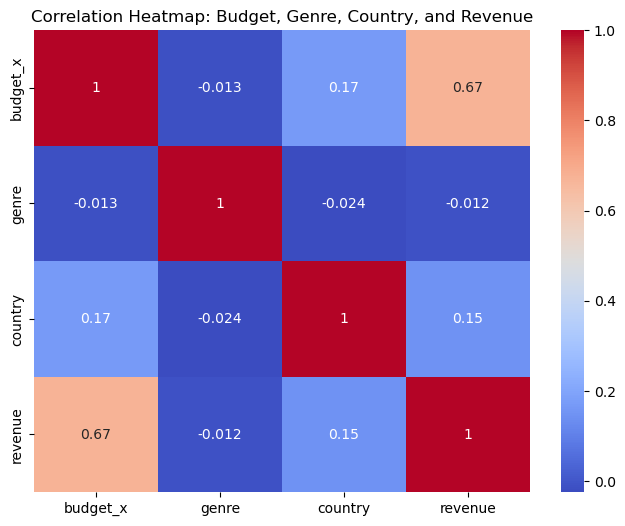

The correlation Heatmap shows that:
-- Budget and revenue are positively correlated (0.67), suggesting that higher-budget movies tend to generate more revenue
- Genre and country have very weak correlations with other variables, indicating that the genre or the country of production does not strongly influence revenue
- Country has a weak positive correlation with revenue suggesting that movies from certain countries might tend to have slightly higher revenues


In [86]:
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap: Budget, Genre, Country, and Revenue")
plt.show()

# Description
print("The correlation Heatmap shows that:")
print("-- Budget and revenue are positively correlated (0.67), suggesting that higher-budget movies tend to generate more revenue")
print("- Genre and country have very weak correlations with other variables, indicating that the genre or the country of production does not strongly influence revenue")
print("- Country has a weak positive correlation with revenue suggesting that movies from certain countries might tend to have slightly higher revenues")


## Additional Questions Based on Dataset

In [89]:
# Which countries produce the highest-rated movies on average?

# Group by 'country' and calculate the average rating ('score') for each country
average_rating_by_country = df.groupby('country')['score'].mean().sort_values(ascending=False).reset_index()

# Display the top 10 countries with the highest average ratings
top_countries = average_rating_by_country.head(10)
print("Top 10 Countries with Highest Average Movie Ratings:")
print(top_countries)


Top 10 Countries with Highest Average Movie Ratings:
  country      score
0      SU  79.800000
1      XC  76.000000
2      PR  76.000000
3      CZ  72.500000
4      DO  72.000000
5      PY  71.000000
6      MU  70.000000
7      MX  69.771429
8      GT  68.000000
9      DK  67.333333


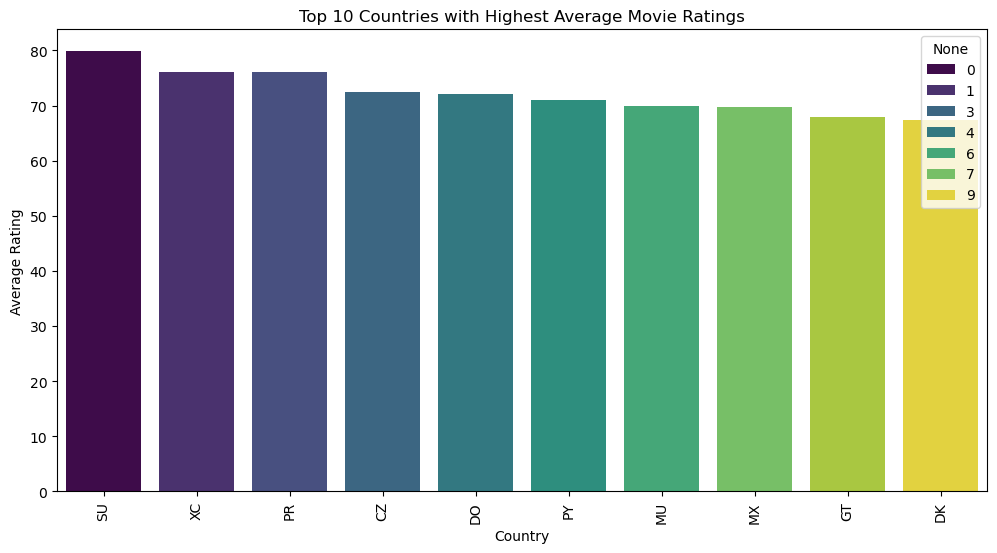

The Highest Average movie ratings shows that:
- It shows that SU has highest average movie ratings


In [91]:
# Plot the results using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_countries, x='country', y='score', hue=top_countries.index, palette='viridis')
plt.title("Top 10 Countries with Highest Average Movie Ratings")
plt.xlabel("Country")
plt.ylabel("Average Rating")
plt.xticks(rotation=90)
plt.show()

# Description
print("The Highest Average movie ratings shows that:")
print("- It shows that SU has highest average movie ratings")


In [93]:
# Does the original language (`orig_lang`) correlate with ratings?

# Group by 'orig_lang' and calculate the average rating for each language
avg_rating_by_lang = df.groupby('orig_lang')['score'].mean().sort_values(ascending=False).reset_index()

top = avg_rating_by_lang.head(20)

# Display the results
print("Average Ratings by Original Language:")
print(top)


Average Ratings by Original Language:
                               orig_lang      score
0                                  Irish  76.000000
1                                  Czech  75.500000
2                                Kannada  75.500000
3                               Galician  75.000000
4                               Dzongkha  74.000000
5                               Gujarati  73.000000
6                               Romanian  72.500000
7                                 Arabic  71.500000
8                              Ukrainian  71.500000
9                                  Latin  71.000000
10                    Catalan, Valencian  71.000000
11                                Danish  69.304348
12                               Persian  68.200000
13                                 Hindi  67.653846
14                            Indonesian  67.636364
15   Bokmål, Norwegian, Norwegian Bokmål  67.000000
16                              Japanese  66.899160
17                        

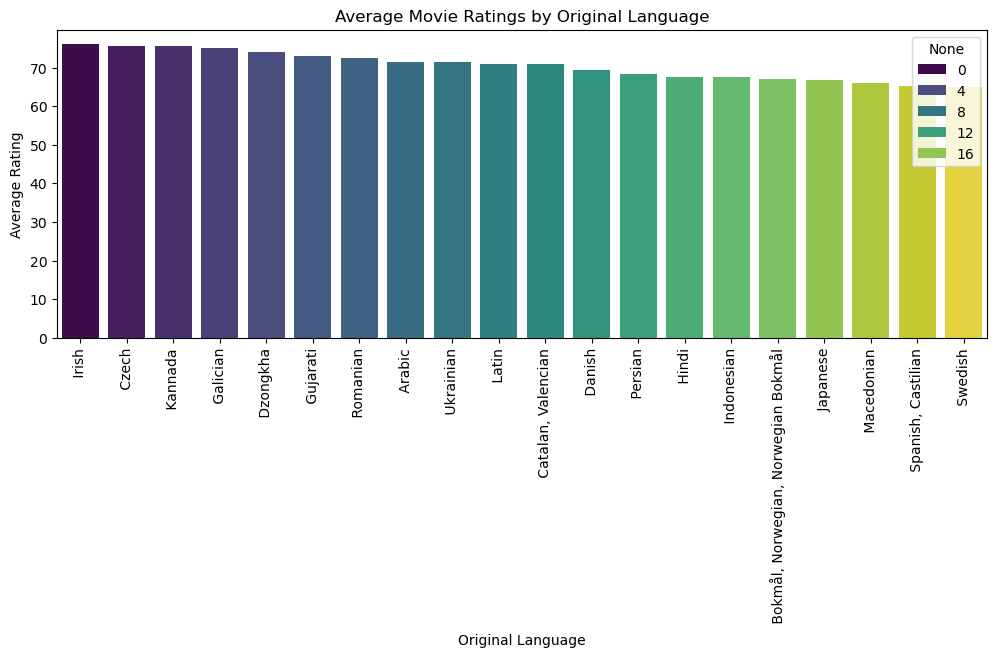

In [95]:
# Plot the results using a barplot
plt.figure(figsize=(12,4))
sns.barplot(data=top, x='orig_lang', y='score', hue=top.index, palette='viridis')
plt.title("Average Movie Ratings by Original Language")
plt.xlabel("Original Language")
plt.ylabel("Average Rating")
plt.xticks(rotation=90)
plt.show()


In [97]:
df["status"]

0         Released
1         Released
2         Released
3         Released
4         Released
           ...    
10173     Released
10174     Released
10175     Released
10176     Released
10177     Released
Name: status, Length: 10178, dtype: object

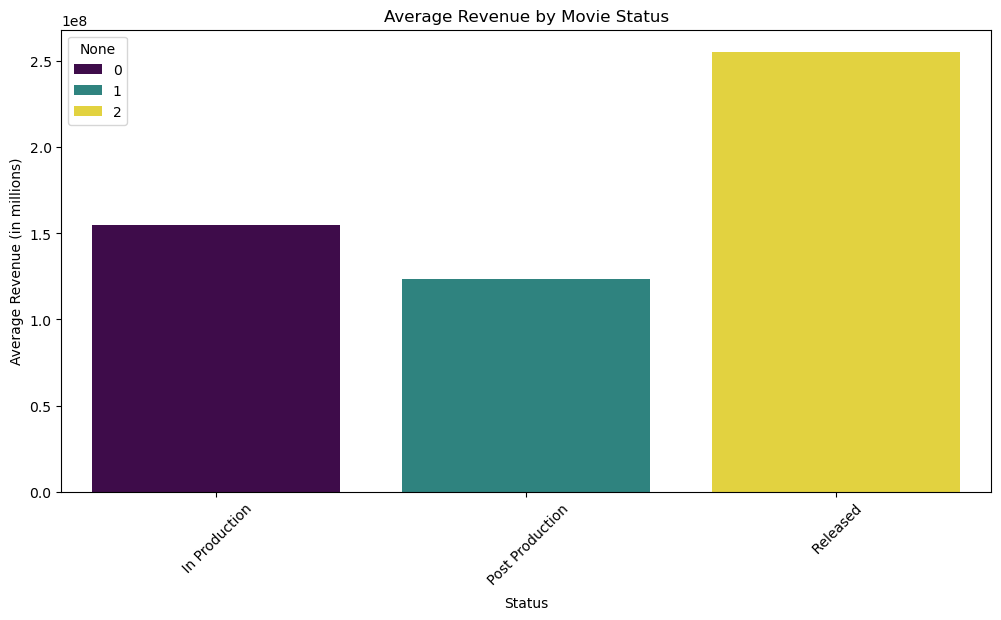

The Average by movie status shows that:
- Status which is released have highest avergae revenue


In [99]:
# Filter out movies with invalid revenue values (e.g., 0 or NaN)
df_filtered_revenue = df[df['revenue'] > 0]  # Filter out rows with zero revenue

# Group by 'status' and calculate the average revenue for each status
avg_revenue_by_status = df_filtered_revenue.groupby('status')['revenue'].mean().reset_index()

# Plot the average revenue by status
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_revenue_by_status, x='status', y='revenue', hue=avg_revenue_by_status.index, palette='viridis')
plt.title("Average Revenue by Movie Status")
plt.xlabel("Status")
plt.ylabel("Average Revenue (in millions)")
plt.xticks(rotation=45)
plt.show()

# Description
print("The Average by movie status shows that:")
print("- Status which is released have highest avergae revenue")

## Insights and Summary

### Task: Summarize key findings

### 1. Budget and Revenue Correlation:
#### There is a strong positive correlation (0.67) between budget and revenue, indicating that movies with higher budgets tend to generate more revenue. This suggests that investing more in movie production is likely to lead to higher financial returns. However, it is important to note that while a higher budget increases the chances of higher revenue, it does not guarantee success. Some high-budget films may still fail to generate expected returns, and there are mid-budget films that perform better than anticipated.

### 2. Consistent Movie Ratings Over Time:
#### From 1980 to 2020, the average IMDB ratings have remained relatively consistent, showing that movie quality, as measured by user ratings, has not drastically changed over time. However, there has been a slight decline after 2020, which could be attributed to shifting audience expectations, a decrease in movie-going experiences due to external factors (such as the pandemic), or a change in the types of content being produced. This trend suggests that while movie quality has remained stable, audience preferences and expectations are evolving.

### 3. Genre-Specific Trends in Budget and Ratings:
#### Certain genres like Fantasy, Drama, and Crime tend to receive higher average ratings, while Action movies often have lower budgets compared to Comedy and Drama films. This shows that more dramatic or fantasy-driven films may receive better audience ratings, possibly due to stronger narratives or unique storytelling. In contrast , Action films often lower production costs but still generate significant box-office returns, showing that action-based contect might be more accessible or widely popular despite its lower production costs.
